In [291]:
import pandas as pd
table_t2d = pd.read_table('../table/QinT2D_shapely.txt')
Metadata = pd.read_table('../../Qin2012T2D/Qin2012T2D_metadata_matched.txt')
Metadata = Metadata[['Run','Diabetic']]
Metadata = Metadata.replace('Y', 'T2D')
Metadata = Metadata.replace('N', 'Healthy')
Metadata = Metadata.rename(columns={"Run":"id","Diabetic":"Status"})

In [292]:
#remove columns with only 0 values
df = table_t2d
df = df.loc[:, (df != 0).any(axis=0)]

In [114]:
df.merge(Metadata, how = 'left',on = 'id').to_csv('../table/QinT2D_shapely_new.txt', sep = '\t')

In [296]:
df_T2D = df.merge(Metadata, how = 'left',on = 'id')

In [298]:
#remove id column, the first column
df_T2D = df_T2D.iloc[: , 1:]

In [299]:
df_T2D

CAG-81 sp900066055  CAG-269 sp900554175  CAG-269 sp001916065  \
0            -0.000941             0.054575            -0.000216   
1            -0.000392             0.015705            -0.000216   
2            -0.000440             0.024682            -0.000216   
3            -0.000417             0.022838            -0.000058   
4            -0.000712             0.024621            -0.000216   
5            -0.000320             0.022782            -0.000244   
6            -0.000720             0.055202            -0.000326   
7            -0.000363             0.024621            -0.000216   
8            -0.000331             0.047105            -0.000216   
9            -0.000356             0.047220             0.000059   
10           -0.000310            -0.002970            -0.001486   
11            0.000268             0.025713            -0.000326   
12            0.000311             0.022838            -0.000254   
13           -0.000310            -0.002963            -0.001235   
14           -0.000363             0.024621            -0.000244   
15           -0.000772             0.047220            -0.000058   
16           -0.000323             0.015705             0.000036   
17           -0.000363             0.025614            -0.000216   
18           -0.000431             0.017253             0.000036   
19           -0.000386             0.024621            -0.000067   
20           -0.000373             0.015739             0.000036   
21           -0.000720             0.047393             0.000036   
22            0.000307             0.027787            -0.000216   
23           -0.000534             0.024621            -0.000216   
24           -0.000336            -0.004298            -0.000466   
25           -0.000392             0.024621            -0.000216   
26           -0.000461             0.047330            -0.000058   
27           -0.000249             0.024682            -0.000216   
28           -0.000379             0.047220            -0.000309   
29            0.000351             0.027864            -0.000007   
30           -0.002434             0.024691             0.000052   

    HGM05232 sp900759955  Massilicoli timonensis  Bilophila sp902373525  \
0              -0.014560                0.000011               0.011115   
1               0.000910                0.000011               0.011115   
2               0.001448                0.000009               0.011115   
3               0.002034               -0.000106               0.005656   
4              -0.023168                0.000011               0.011115   
5               0.001448                0.000024               0.011115   
6              -0.014560               -0.000170               0.011115   
7               0.001448               -0.000262               0.011115   
8               0.000910                0.000011               0.011115   
9               0.000910                0.000008               0.011115   
10             -0.014560                0.000009               0.011115   
11              0.000910                0.000012               0.011115   
12              0.002095                0.000018               0.012386   
13              0.000923                0.000015               0.011115   
14              0.000910               -0.000168               0.011115   
15              0.002046               -0.000123               0.005656   
16              0.000910                0.000009               0.011115   
17              0.000910               -0.000121               0.011115   
18              0.000910                0.000009               0.011115   
19              0.000923               -0.000123               0.011115   
20              0.000910                0.000015               0.011115   
21              0.000910                0.000013               0.011115   
22              0.000910                0.000011               0.011115   
23              0.001448   

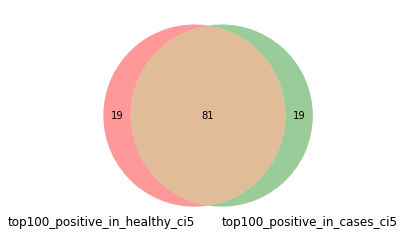

In [305]:
#calculate ci for each column
#1.sort df_T2D by Status
df_T2D_healthy = df_T2D.loc[df_T2D['Status'] == 'Healthy']
df_T2D_case = df_T2D.loc[df_T2D['Status'] == 'T2D']
df_T2D_healthy = df_T2D_healthy.T[:-1]
df_T2D_case = df_T2D_case.T[:-1]

df_T2D_healthy['mean'] = df_T2D_healthy.mean(axis=1)
df_T2D_healthy['sem'] = df_T2D_healthy.sem(axis=1)

df_T2D_case['mean'] = df_T2D_case.mean(axis=1)
df_T2D_case['sem'] = df_T2D_case.sem(axis=1)


#2.calculate 5% for each column
df_T2D_healthy['ci95_lo'] = df_T2D_healthy['mean'] - 1.96* df_T2D_healthy['sem']
df_T2D_case['ci95_lo'] = df_T2D_case['mean'] - 1.96* df_T2D_case['sem']

#3.calculate 95% for each column
df_T2D_healthy['ci95_hi'] = df_T2D_healthy['mean'] + 1.96* df_T2D_healthy['sem']
df_T2D_case['ci95_hi'] = df_T2D_case['mean'] + 1.96* df_T2D_case['sem']

#4.list of top100 microbes with positive values in healthy controls
top100_positive_in_healthy_ci5 = df_T2D_healthy.sort_values(by=['ci95_lo']).tail(100)
a = set(top100_positive_in_healthy_ci5.index)

top100_positive_in_cases_ci5 = df_T2D_case.sort_values(by=['ci95_lo']).tail(100)
b = set(top100_positive_in_cases_ci5.index)

venn2([a, b], ('top100_positive_in_healthy_ci5', 'top100_positive_in_cases_ci5'))


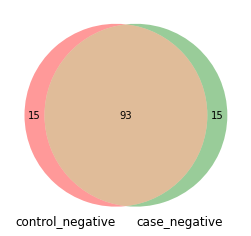

In [331]:
#negative in case vs negative in control
df_T2D_case_negative = df_T2D_case.loc[df_T2D_case['ci95_hi']<0]
df_T2D_control_negative = df_T2D_healthy.loc[df_T2D_healthy['ci95_hi']<0]
venn2([set(df_T2D_control_negative.index), set(df_T2D_case_negative.index)], ('control_negative', 'case_negative'))

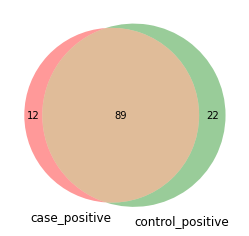

In [334]:
#positive in case vs positive in control
df_T2D_case_positive = df_T2D_case.loc[df_T2D_case['ci95_lo']>0]
df_T2D_control_positive = df_T2D_healthy.loc[df_T2D_healthy['ci95_lo']>0]
venn2([set(df_T2D_case_positive.index), set(df_T2D_control_positive.index)], ('case_positive', 'control_positive'))

In [ ]:
#The majority overlap in both groups

In [317]:
a-b

{'Actinomyces oris',
 'Agathobacter sp900547695',
 'Akkermansia muciniphila',
 'Azonexus sp900549295',
 'Bifidobacterium scardovii',
 'Bilophila sp900553145',
 'Blautia_A sp900551715',
 'CAG-145 sp900540145',
 'CAG-145 sp900545135',
 'CAG-245 sp900761475',
 'CAG-269 sp000438255',
 'CAG-269 sp900555615',
 'CAG-269 sp900556695',
 'CAG-449 sp000432895',
 'UBA7748 sp900314535',
 'UMGS1670 sp900553995',
 'UMGS1696 sp900763885',
 'UMGS1975 sp900751745',
 'UMGS911 sp003343545'}

In [311]:
#only in healhty
df_T2D_healthy.loc[df_T2D_healthy.index.isin(a-b)].sort_values(by=['ci95_lo'])

1         2         3         5         7  \
CAG-145 sp900545135        0.000034  0.000096  0.000083  0.000061  0.000061   
CAG-145 sp900540145        0.000189  0.000059  0.000059  0.000099   0.00005   
CAG-449 sp000432895        0.000138  0.000139   0.00007  0.000143  0.000458   
Bifidobacterium scardovii  0.000263  0.000639  0.000175  0.000263  0.000464   
UMGS1975 sp900751745       0.003488  0.003488  0.003488    0.0034  0.003432   
UMGS911 sp003343545        0.000336  0.000195  0.000319  0.000326  0.000319   
Actinomyces oris           0.004014  0.012173 -0.018062  0.004014   0.00564   
UBA7748 sp900314535        0.004625  0.004734 -0.015354  0.009009  0.004734   
CAG-269 sp000438255       -0.002953 -0.002953  0.020638 -0.001769 -0.002953   
CAG-269 sp900555615        0.000652  0.000652  0.000652  0.000652  0.000652   
CAG-269 sp900556695         0.03334 -0.005709 -0.005895 -0.008806 -0.004281   
Azonexus sp900549295       0.006174   0.00785  0.002343  0.006174   0.01028   
Akkermansia muciniphila    0.004596 -0.015972  0.004556  0.004556  0.006168   
UMGS1670 sp900553995      -0.004469  0.030661  0.030661 -0.001752 -0.000871   
CAG-245 sp900761475        -0.00122  0.010105  0.010105  0.013802 -0.001218   
Bilophila sp900553145      0.020502  0.006776  0.005923  0.006443  0.020502   
Blautia_A sp900551715      0.018807   0.05374  0.018807  0.018807  0.018807   
UMGS1696 sp900763885       0.199951 -0.009946 -0.003995  0.199951  0.200134   
Agathobacter sp900547695  -0.003696 -0.009399  0.199681 -0.003696 -0.003698   

                                 10        13        18        19        20  \
CAG-145 sp900545135        0.000037  0.000063  0.000075  0.000035  0.000067   
CAG-145 sp900540145        0.000084  0.000099  0.000099  0.000099   0.00005   
CAG-449 sp000432895        0.000139  0.000072  0.000139  0.000072  0.000458   
Bifidobacterium scardovii  0.000114  0.000263  0.000263  0.000263  0.000263   
UMGS1975 sp900751745       0.003488  0.003488  0.003488 -0.015939  0.003505   
UMGS911 sp003343545        0.000319  0.000195  0.000336  0.000205  0.000195   
Actinomyces oris           0.001597  0.004014  0.004014  0.004014  0.004014   
UBA7748 sp900314535        0.003479  0.000448   0.00035  0.004724   0.00035   
CAG-269 sp000438255        0.034001  0.034455 -0.001765 -0.002945  0.034455   
CAG-269 sp900555615        0.000652  0.001221  0.000652  0.000652  0.000652   
CAG-269 sp900556695        0.033294  0.022131 -0.005709 -0.004287   0.03334   
Azonexus sp900549295      -0.006553  0.011936  0.006174  0.006174  0.006174   
Akkermansia muciniphila    0.004373  0.004589  0.026693  0.004596  0.006129   
UMGS1670 sp900553995      -0.001481 -0.001752 -0.001752  0.077366  0.024621   
CAG-245 sp900761475        0.013831  0.013831  -0.00122  -0.00122  0.013802   
Bilophila sp900553145      0.020502  0.020502  0.004657   0.02049  0.022275   
Blautia_A sp900551715      0.021991  0.019078  0.018807 -0.013541  0.021624   
UMGS1696 sp900763885      -0.009754 -0.009933 -0.009933 -0.004027 -0.003978   
Agathobacter sp900547695  -0.009216 -0.009387 -0.009387  0.202087  0.198134   

                                 21        24        25        26        28  \
CAG-145 sp900545135        0.000248  0.000032  0.000159  0.000063  0.000061   
CAG-145 sp900540145        0.000059  0.000059  0.000052  0.000238   0.00005   
CAG-449 sp000432895        0.000458 -0.000465  0.000139  0.000139  0.000458   
Bifidobacterium scardovii -0.000439   0.00029   0.00016 -0.000439  0.000464   
UMGS1975 sp900751745       0.003505  0.003505  0.003505  0.003488  0.003488   
UMGS911 sp003343545        0.000195  0.000107  0.000181  0.000336  0.000195   
Actinomyces oris           0.003971  0.004449  0.002296  0.003971   0.00564   
UBA7748 sp900314535        0.004625 -0.000796  0.003479  0.008875  0.008539   
CAG-269 sp000438255       -0.001769  0.034362 -0.002953  -0.00297 -0.002953   
CAG-269 sp900555615        0.000652  0.000652  0.001221  0.000652  0.000652   
CAG

In [285]:
top100_positive_in_healthy_ci5

1         2         3         5         7  \
Varibaculum cambriense_A   0.000054  0.000032  0.000032  0.000042  0.000057   
CAG-313 sp900760745         0.00003  0.000045   0.00005  0.000093  0.000045   
CAAGGB01 sp900769285        0.00005   0.00005  0.000084   0.00005   0.00005   
UMGS1293 sp900754495       0.000048  0.000048  0.000048  0.000039  0.000048   
Vagococcus teuberi          0.00003  0.000037  0.000063  0.000114  0.000047   
...                             ...       ...       ...       ...       ...   
Bacteroides nordii         0.060825   0.05928  0.052778  0.034545  0.067973   
Bacteroides fragilis       0.068168  0.039088   0.06468  0.068168  0.062593   
Acinetobacter sp900771065  0.092877  0.080065  0.076967    0.0905  0.091964   
Anaerococcus senegalensis  0.085335  0.089833  0.062042  0.121297  0.135817   
Bacteroides salyersiae     0.254299  0.089266  0.199283  0.246075  0.176907   

                                 10        13        18        19        20  \
Varibaculum cambriense_A    0.00004   0.00004  0.000054  0.000054  0.000042   
CAG-313 sp900760745        0.000062  0.000042  0.000064  0.000045   0.00003   
CAAGGB01 sp900769285        0.00005  0.000035  0.000034  0.000084   0.00005   
UMGS1293 sp900754495       0.000048  0.000039  0.000048  0.000048  0.000033   
Vagococcus teuberi          0.00008  0.000046  0.000074  0.000047  0.000029   
...                             ...       ...       ...       ...       ...   
Bacteroides nordii         0.052262  0.043717  0.071525   0.05488  0.042817   
Bacteroides fragilis       0.065698  0.035958  0.068168  0.068167  0.068167   
Acinetobacter sp900771065  0.088907  0.081837  0.069725  0.053796  0.082892   
Anaerococcus senegalensis   0.11088  0.101325  0.078711  0.096659  0.117997   
Bacteroides salyersiae     0.239603  0.094552  0.208515   0.06552  0.072765   

                                 21        24        25        26        28  \
Varibaculum cambriense_A   0.000054   0.00004  0.000054   0.00004   0.00004   
CAG-313 sp900760745        0.000047  0.000064  0.000046  0.000041  0.000033   
CAAGGB01 sp900769285        0.00005  0.000049  0.000035  0.000035   0.00005   
UMGS1293 sp900754495       0.000048  0.000048  0.000048  0.000048  0.000048   
Vagococcus teuberi         0.000055  0.000074  0.000043  0.000041   0.00003   
...                             ...       ...       ...       ...       ...   
Bacteroides nordii         0.060876  0.060017   0.06298  0.052642  0.052262   
Bacteroides fragilis       0.068167   0.06468  0.037076  0.064681  0.068167   
Acinetobacter sp900771065  0.101654  0.067637  0.091403  0.086272  0.093975   
Anaerococcus senegalensis  0.102824  0.109289  0.110627  0.058607  0.082872   
Bacteroides salyersiae     0.064918  0.032629  0.099854  0.155706  0.099765   

                                 29      mean       sem   ci95_lo   ci95_hi  
Varibaculum cambriense_A   0.000054  0.000045  0.000002  0.000042  0.000049  
CAG-313 sp900760745        0.000045  0.000049  0.000004  0.000042  0.000056  
CAAGGB01 sp900769285        0.00005  0.000050  0.000003  0.000044  0.000057  
UMGS1293 sp900754495       0.000062  0.000047  0.000001  0.000044  0.000049  
Vagococcus teuberi         0.000099  0.000057  0.000006  0.000045  0.000068  
...                             ...       ...       ...       ...       ...  
Bacteroides nordii         0.093882  0.057704  0.003169  0.051493  0.063915  
Bacteroides fragilis       0.068088  0.061232  0.002814  0.055717  0.066748  
Acinetobacter sp900771065  0.083683  0.083385  0.002797  0.077902  0.088867  
Anaerococcus senegalensis  0.042603  0.094170  0.005869  0.082667  0.105673  
Bacteroides salyersiae     0.078211  0.136117  0.017441  0.101933  0.170300  

[100 rows x 20 columns]

In [286]:
top100_positive_in_cases_ci5

0         4         6         8         9  \
Barnesiella sp900538705    0.000101  0.000073  0.000073  0.000038  0.000046   
UMGS911 sp900545935        0.000116  0.000116  0.000116 -0.000094 -0.000094   
Alloscardovia omnicolens    0.00004  0.000039   0.00004  0.000039 -0.000119   
UMGS1707 sp900554285       0.000028   0.00002  0.000028   0.00002   0.00002   
CAG-488 sp900554995        0.000027  0.000016  0.000016   0.00002  0.000016   
...                             ...       ...       ...       ...       ...   
Bacteroides fragilis       0.039169  0.037074  0.068167  0.068167  0.039169   
Bacteroides nordii         0.073014   0.07143   0.05405    0.0524  0.046361   
Anaerococcus senegalensis  0.091547  0.078711  0.090708  0.110769  0.122241   
Acinetobacter sp900771065  0.074094  0.087411  0.108665   0.10538  0.066092   
Bacteroides salyersiae     0.176958  0.210856  0.107926  0.100683  0.145201   

                                 11        12        14        15        16  \
Barnesiella sp900538705     0.00008  0.000071 -0.000109  0.000068  0.000038   
UMGS911 sp900545935         0.00008   0.00008  0.000125   0.00008 -0.000094   
Alloscardovia omnicolens   0.000043  0.000064   0.00004  0.000031  0.000032   
UMGS1707 sp900554285       0.000028 -0.000035  0.000029  0.000028  0.000016   
CAG-488 sp900554995        0.000015  0.000012  0.000016  0.000016  0.000012   
...                             ...       ...       ...       ...       ...   
Bacteroides fragilis       0.039168  0.068167  0.068168  0.068168  0.068087   
Bacteroides nordii         0.051026  0.049253  0.062599  0.085775  0.061095   
Anaerococcus senegalensis  0.102333  0.117239  0.135802 -0.050538  0.110563   
Acinetobacter sp900771065  0.076643   0.10901   0.09025  0.073927  0.097623   
Bacteroides salyersiae     0.117742  0.147754  0.108169  0.066331  0.210605   

                                 17        22        23        27        30  \
Barnesiella sp900538705   -0.000109  0.000098  0.000068 -0.000071  0.000183   
UMGS911 sp900545935         0.00008 -0.000094  0.000116   0.00008  0.000116   
Alloscardovia omnicolens   0.000031   0.00004  0.000054   0.00004  0.000064   
UMGS1707 sp900554285       0.000046  0.000021   0.00002   0.00002  0.000028   
CAG-488 sp900554995        0.000019   0.00002  0.000016  0.000013  0.000011   
...                             ...       ...       ...       ...       ...   
Bacteroides fragilis       0.068168  0.068168  0.068168  0.068168  0.062592   
Bacteroides nordii         0.035124  0.061205  0.071525  0.054837  0.104249   
Anaerococcus senegalensis  0.117802  0.110922  0.102204  0.123459  0.043049   
Acinetobacter sp900771065  0.091263  0.087323   0.07836  0.077066  0.083153   
Bacteroides salyersiae     0.147592  0.208187  0.108936  0.208187 -0.033388   

                               mean           sem   ci95_lo   ci95_hi  
Barnesiella sp900538705    0.000043  1.942675e-05  0.000005  0.000081  
UMGS911 sp900545935        0.000049  2.181000e-05  0.000006  0.000091  
Alloscardovia omnicolens   0.000032  1.035971e-05  0.000012  0.000052  
UMGS1707 sp900554285       0.000021  4.152332e-06  0.000013  0.000029  
CAG-488 sp900554995        0.000016  9.672791e-07  0.000014  0.000018  
...                             ...           ...       ...       ...  
Bacteroides fragilis       0.059918  3.227421e-03  0.053592  0.066244  
Bacteroides nordii         0.062263  4.137452e-03  0.054154  0.070372  
Anaerococcus senegalensis  0.093787  1.103690e-02  0.072155  0.115420  
Acinetobacter sp900771065  0.087084  3.229647e-03  0.080754  0.093414  
Bacteroides salyersiae     0.135449  1.594825e-02  0.104191  0.166708  

[100 rows x 19 columns]

In [71]:
df.T.sort_values(by=['Healthy']).to_csv('../table/QinT2D_shapely_new_sorted.txt', sep = '\t')

In [9]:
df.T.sort_values(by=['T2D'])

Status                       Healthy       T2D
Bacteroides pyogenes       -0.197742 -0.130667
UMGS1908 sp900556185       -0.067350 -0.078209
Bacteroides massiliensis_A -0.064331 -0.059154
Blautia_A schinkii         -0.037310 -0.057279
Actinomyces sp000220835    -0.061590 -0.053624
...                              ...       ...
CAG-485 sp900321585         0.052520  0.067386
Acinetobacter sp900771065   0.083385  0.087084
Anaerococcus senegalensis   0.094170  0.093787
Bacteroides salyersiae      0.136117  0.135449
sum                         0.382007  0.372622

[276 rows x 2 columns]

In [12]:
dfT = df.T

In [24]:
set_healthy_positive = set(dfT.loc[(dfT['Healthy'] > 0)].index)
set_healthy_negative = set(dfT.loc[(dfT['Healthy'] < 0)].index)

In [22]:
set_T2D_positive = set(dfT.loc[(dfT['T2D'] > 0)].index)
set_T2D_negative = set(dfT.loc[(dfT['T2D'] < 0)].index)

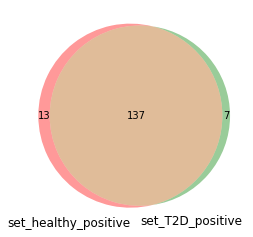

In [29]:
from matplotlib_venn import venn3, venn2
venn2([set_healthy_positive, set_T2D_positive], ('set_healthy_positive','set_T2D_positive'))


In [303]:
list(b - a)

['CAG-127 sp900767585',
 'CAG-488 sp900554995',
 'Brachyspira pilosicoli',
 'Acinetobacter ursingii',
 'CAG-110 sp900752285',
 'CAG-269 sp900753165',
 'Bifidobacterium adolescentis',
 'Acinetobacter variabilis',
 'UMGS1707 sp900554285',
 'UMGS911 sp900545935',
 'CAG-485 sp002361235',
 'Varibaculum cambriense_A',
 'Veillonella sp009929605',
 'Anaerotruncus colihominis',
 'Alistipes sp002358415',
 'Bacteroides sp900547205',
 'CAG-484 sp900321895',
 'Alloscardovia omnicolens',
 'UMGS973 sp900547295']

In [30]:
#have positive values specific in healthy controls
list(set_healthy_positive - set_T2D_positive)

['UMGS995 sp900769695',
 'UMGS911 sp003343545',
 'Bifidobacterium breve',
 'CAG-269 sp000438255',
 'CAG-1427 sp000431675',
 'Prevotellamassilia sp900541575',
 'CAG-488 sp000434055',
 'UMGS1600 sp900553295',
 'Bifidobacterium scardovii',
 'UMGS1858 sp900555705',
 'UMGS1668 sp900768105',
 'Blautia_A sp900547615',
 'CAG-180 sp900545625']

In [31]:
#have positive values only in T2D cases
list(set_T2D_positive - set_healthy_positive)

['UMGS1518 sp900552575',
 'Anaerotruncus massiliensis',
 'Barnesiella sp900538705',
 'Yersinia massiliensis',
 'Acidaminococcus intestini',
 'CAG-485 sp002361235',
 'Yersinia enterocolitica']

In [32]:
dfT[dfT.index.isin(list(set_T2D_positive - set_healthy_positive))]

Status                       Healthy       T2D
Barnesiella sp900538705    -0.000060  0.000043
CAG-485 sp002361235        -0.004608  0.024831
Yersinia enterocolitica    -0.000017  0.000002
Yersinia massiliensis      -0.006109  0.005619
UMGS1518 sp900552575       -0.000009  0.000010
Anaerotruncus massiliensis -0.000076  0.000078
Acidaminococcus intestini  -0.005382  0.003175

In [33]:
dfT[dfT.index.isin(list(set_healthy_positive - set_T2D_positive))]

Status                           Healthy       T2D
CAG-269 sp000438255             0.008135 -0.000985
UMGS1668 sp900768105            0.000034 -0.000013
UMGS995 sp900769695             0.005846 -0.003019
Bifidobacterium breve           0.000048 -0.000092
CAG-488 sp000434055             0.001200 -0.004555
Prevotellamassilia sp900541575  0.019940 -0.016502
UMGS911 sp003343545             0.000247 -0.000161
UMGS1600 sp900553295            0.000052 -0.000357
UMGS1858 sp900555705            0.000138 -0.000302
CAG-180 sp900545625             0.001418 -0.001257
CAG-1427 sp000431675            0.000265 -0.000798
Blautia_A sp900547615           0.000174 -0.005607
Bifidobacterium scardovii       0.000217 -0.000085

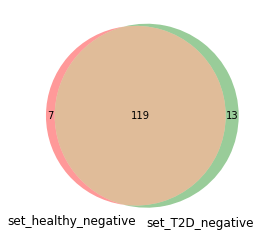

In [27]:
venn2([set_healthy_negative, set_T2D_negative], ('set_healthy_negative','set_T2D_negative'))

<AxesSubplot:>

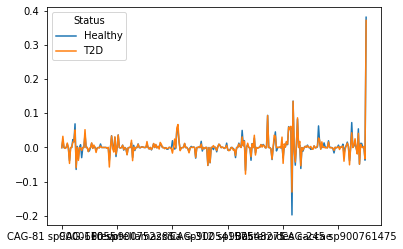

In [25]:
df.T.plot()

In [44]:
dfT = df.T

In [45]:
dfT

Status                      Healthy       T2D
CAG-81 sp900066055        -0.000355 -0.000481
CAG-269 sp900554175        0.022027  0.032814
CAG-269 sp001916065       -0.000293 -0.000171
HGM05232 sp900759955      -0.001639 -0.002567
Massilicoli timonensis    -0.000059 -0.000071
...                             ...       ...
CAG-177 sp000431775        0.011847  0.001497
Butyricimonas sp900184685 -0.000138 -0.000109
CABMKH01 sp902386935       0.002695  0.002849
Agathobacter rectalis     -0.037101 -0.033511
sum                        0.382007  0.372622

[276 rows x 2 columns]

In [46]:
dfT['n'] = dfT.index

In [51]:
dfT.insert(0, 'New_ID', range(1, 1 + len(dfT)))

In [56]:
dfT

Status                     New_ID   Healthy       T2D  \
CAG-81 sp900066055              1 -0.000355 -0.000481   
CAG-269 sp900554175             2  0.022027  0.032814   
CAG-269 sp001916065             3 -0.000293 -0.000171   
HGM05232 sp900759955            4 -0.001639 -0.002567   
Massilicoli timonensis          5 -0.000059 -0.000071   
...                           ...       ...       ...   
CAG-177 sp000431775           272  0.011847  0.001497   
Butyricimonas sp900184685     273 -0.000138 -0.000109   
CABMKH01 sp902386935          274  0.002695  0.002849   
Agathobacter rectalis         275 -0.037101 -0.033511   
sum                           276  0.382007  0.372622   

Status                                       species  
CAG-81 sp900066055                CAG-81 sp900066055  
CAG-269 sp900554175              CAG-269 sp900554175  
CAG-269 sp001916065              CAG-269 sp001916065  
HGM05232 sp900759955            HGM05232 sp900759955  
Massilicoli timonensis        Massilicoli timonensis  
...                                              ...  
CAG-177 sp000431775              CAG-177 sp000431775  
Butyricimonas sp900184685  Butyricimonas sp900184685  
CABMKH01 sp902386935            CABMKH01 sp902386935  
Agathobacter rectalis          Agathobacter rectalis  
sum                                              sum  

[276 rows x 4 columns]

<AxesSubplot:xlabel='Healthy', ylabel='New_ID'>

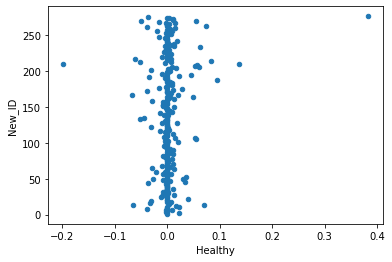

In [65]:
dfT.plot.scatter(x = 'Healthy', y = 'New_ID')

<AxesSubplot:xlabel='T2D', ylabel='New_ID'>

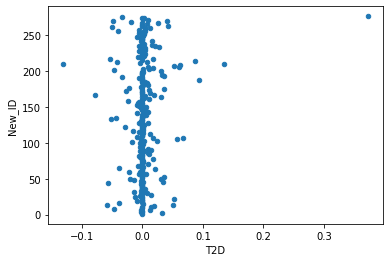

In [66]:
dfT.plot.scatter(x = 'T2D', y = 'New_ID')